In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.autograd import Variable
%load_ext autoreload
%autoreload 2

In [2]:
# Defining a toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                        [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

## Linear regression

In [4]:
class MyLinearRegression:
    def __init__(self):
        # TODO: Define the parameters of the model (weights and biases)
        self.weights = torch.tensor([0.0],requires_grad=True)
        self.biases = torch.tensor([0.0],requires_grad=True)
        
    
    def forward(self, x):
        # TODO: implement forward computation - compute predictions based on the inputs
        return self.weights*x + self.biases
    
    def parameters(self):
        # TODO: this function should return a list of parameters of the model
        return [self.weights,self.biases]
    
    def __call__(self, x):
        # Convenience function
        return self.forward(x)
    

def mselossfunc(pred, y):
    # TODO: implement the MSE loss function
    return torch.pow(y-pred,2).mean()

model = MyLinearRegression()
numpy_inputs = np.asarray([0.0, 1.0, 2.0], dtype = np.float32)
torch_inputs = torch.from_numpy(numpy_inputs)
torch_outputs = model(torch_inputs)
print("Testing model: an input of %s gives a prediction:\n %s" % (numpy_inputs, torch_outputs))

Testing model: an input of [0. 1. 2.] gives a prediction:
 tensor([0., 0., 0.], grad_fn=<AddBackward0>)


In [5]:
def train(features, labels, model, lossfunc, optimizer, num_epoch):

    for epoch in range(num_epoch):
        # TODO: Step 1 - create torch variables corresponding to features and labels
        x = torch.from_numpy(features)
        y = torch.from_numpy(labels)
        # TODO: Step 2 - compute model predictions and loss
        y_pred = model(x)
        loss = lossfunc(y_pred,y)
        # TODO: Step 3 - do a backward pass and a gradient update step
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if epoch % 10 == 0:
            print ('Epoch [%d/%d], Loss: %.4f' 
                   %(epoch+1, num_epoch, loss.item()))
        
        
def visualize(x_train, y_train, model):
    # A convenience function for visualizing predictions given by the model

    predicted = model(torch.from_numpy(x_train)).data.numpy()
    order = np.argsort(x_train, axis = 0)
    plt.plot(x_train[order].flatten(), y_train[order].flatten(), 'ro', label='Original data')
    plt.plot(x_train[order].flatten(), predicted[order].flatten(), label='Fitted line')
    plt.legend()
    plt.show()

Epoch [1/150], Loss: 0.2315
Epoch [11/150], Loss: 0.2306
Epoch [21/150], Loss: 0.2302
Epoch [31/150], Loss: 0.2298
Epoch [41/150], Loss: 0.2295
Epoch [51/150], Loss: 0.2292
Epoch [61/150], Loss: 0.2289
Epoch [71/150], Loss: 0.2286
Epoch [81/150], Loss: 0.2283
Epoch [91/150], Loss: 0.2280
Epoch [101/150], Loss: 0.2277
Epoch [111/150], Loss: 0.2274
Epoch [121/150], Loss: 0.2271
Epoch [131/150], Loss: 0.2268
Epoch [141/150], Loss: 0.2265


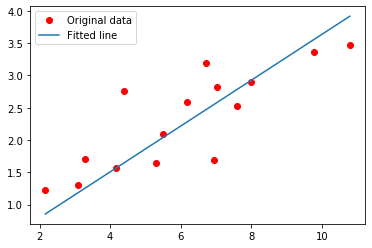

In [7]:
# Training and visualizing predictions made by linear regression model
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

train(features = x_train,
      labels = y_train,
      model = model,
      lossfunc = mselossfunc, 
      optimizer = optimizer,
      num_epoch = 150)
visualize(x_train, y_train, model)

## Linear Regression (using nn package)

Epoch [1/100], Loss: 22.6594
Epoch [11/100], Loss: 4.1046
Epoch [21/100], Loss: 1.0582
Epoch [31/100], Loss: 0.5570
Epoch [41/100], Loss: 0.4735
Epoch [51/100], Loss: 0.4585
Epoch [61/100], Loss: 0.4549
Epoch [71/100], Loss: 0.4530
Epoch [81/100], Loss: 0.4515
Epoch [91/100], Loss: 0.4501


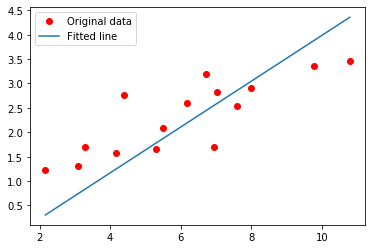

In [11]:
class NNLinearRegression(nn.Module):
    def __init__(self):
        super(NNLinearRegression, self).__init__()
        # TODO: Define the parameters of the model (linear nn layer)
        self.linear = nn.Linear(1,1)
    
    def forward(self, x):
        # TODO: implement forward computation
        return self.linear.forward(x)
            
# Training and visualizing predictions made by linear regression model (nn package)
# TODO: use loss function from nn package
lossfunc = nn.MSELoss()

model = NNLinearRegression()

optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

train(features = x_train,
      labels = y_train,
      model = model,
      lossfunc = lossfunc,
      optimizer = optimizer,
      num_epoch = 100)
visualize(x_train, y_train, model)

## MLP

Epoch [1/200], Loss: 5.4250
Epoch [11/200], Loss: 1.9877
Epoch [21/200], Loss: 0.7470
Epoch [31/200], Loss: 0.5633
Epoch [41/200], Loss: 0.5387
Epoch [51/200], Loss: 0.5395
Epoch [61/200], Loss: 0.5375
Epoch [71/200], Loss: 0.5306
Epoch [81/200], Loss: 0.5180
Epoch [91/200], Loss: 0.4924
Epoch [101/200], Loss: 0.4349
Epoch [111/200], Loss: 0.3394
Epoch [121/200], Loss: 0.2467
Epoch [131/200], Loss: 0.1994
Epoch [141/200], Loss: 0.1886
Epoch [151/200], Loss: 0.1880
Epoch [161/200], Loss: 0.1871
Epoch [171/200], Loss: 0.1856
Epoch [181/200], Loss: 0.1845
Epoch [191/200], Loss: 0.1836


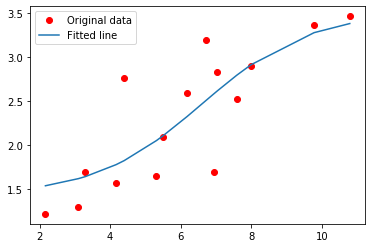

In [23]:
class MLP(nn.Module):
    def __init__(self, hidden_size):
        super(MLP, self).__init__()
        # TODO: Define parameters / layers of a multi-layered perceptron with one hidden layer
        self.fc1 = nn.Linear(1,hidden_size)
        self.relu=nn.Sigmoid()
        self.fc2 = nn.Linear(hidden_size,1)
    
    def forward(self, x):
        return self.fc2(self.relu(self.fc1(x)))
        
    
# TODO: Play with learning rate, hidden size, and optimizer type for multi-layered perceptron
hidden_size = 2
learning_rate = 1e-1


model = MLP(hidden_size = hidden_size)

optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

train(features = x_train,
      labels = y_train,
      model = model,
      lossfunc = lossfunc,
      optimizer = optimizer,
      num_epoch = 200)
visualize(x_train, y_train, model)